In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('../data/raw/GOOGL.csv')
print(df.columns)
print(df.head())


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        Price               Close               High                 Low  \
0      Ticker               GOOGL              GOOGL               GOOGL   
1        Date                 NaN                NaN                 NaN   
2  2015-01-02  26.319652557373047  26.63028955632621  26.236648546281916   
3  2015-01-05  25.818159103393555  26.24211680222551  25.733170002740895   
4  2015-01-06   25.18098258972168  25.90513806417547  25.126806918150155   

                 Open    Volume  
0               GOOGL     GOOGL  
1                 NaN       NaN  
2  26.471241668562634  26480000  
3  26.200367371172735  41182000  
4  25.869850124114954  54456000  


In [6]:
df = pd.read_csv('../data/raw/GOOGL.csv', skiprows=2, parse_dates=[0], index_col=0)



In [7]:
df.index.name = 'Date'

In [8]:

print(df.head())
print(df.info())

            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
Date                                                                  
2015-01-02   26.319653   26.630290   26.236649   26.471242    26480000
2015-01-05   25.818159   26.242117   25.733170   26.200367    41182000
2015-01-06   25.180983   25.905138   25.126807   25.869850    54456000
2015-01-07   25.106926   25.422036   25.032374   25.395198    46918000
2015-01-08   25.194401   25.223724   24.603443   24.926010    73054000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 1  2516 non-null   float64
 1   Unnamed: 2  2516 non-null   float64
 2   Unnamed: 3  2516 non-null   float64
 3   Unnamed: 4  2516 non-null   float64
 4   Unnamed: 5  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB
None


In [9]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']


In [10]:
print(df.head())
print(df.info())


                 Open       High        Low      Close    Volume
Date                                                            
2015-01-02  26.319653  26.630290  26.236649  26.471242  26480000
2015-01-05  25.818159  26.242117  25.733170  26.200367  41182000
2015-01-06  25.180983  25.905138  25.126807  25.869850  54456000
2015-01-07  25.106926  25.422036  25.032374  25.395198  46918000
2015-01-08  25.194401  25.223724  24.603443  24.926010  73054000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB
None


In [11]:
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [12]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


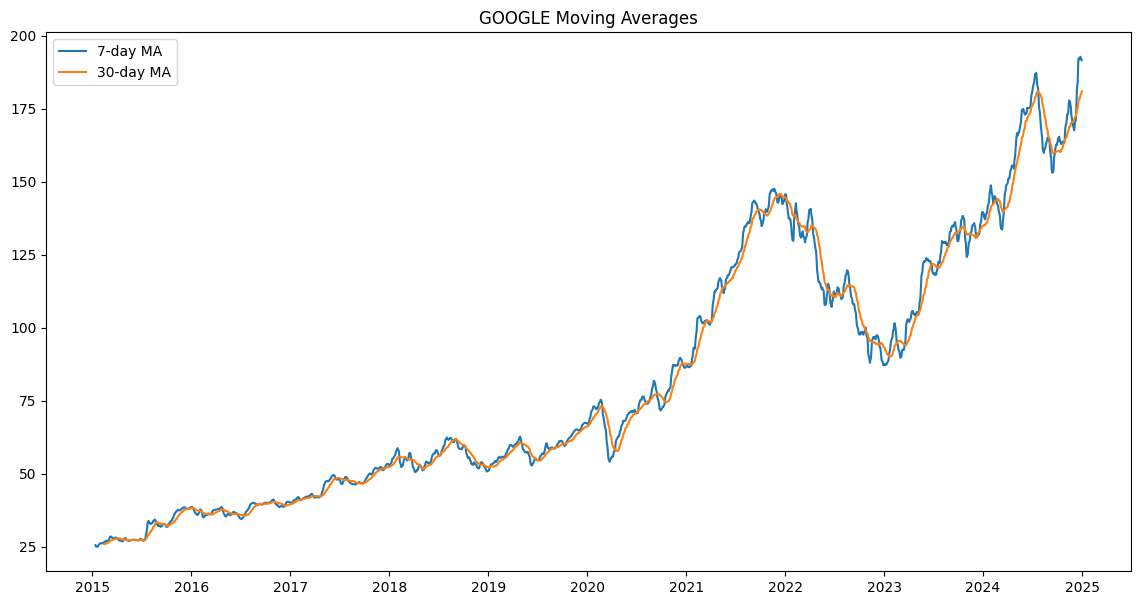

In [13]:
plt.figure(figsize=(14,7))

plt.plot(df['MA_7'], label='7-day MA')
plt.plot(df['MA_30'], label='30-day MA')
plt.title('GOOGLE Moving Averages')
plt.legend()
plt.show()

In [14]:
df['Return'] = df['Close'].pct_change()

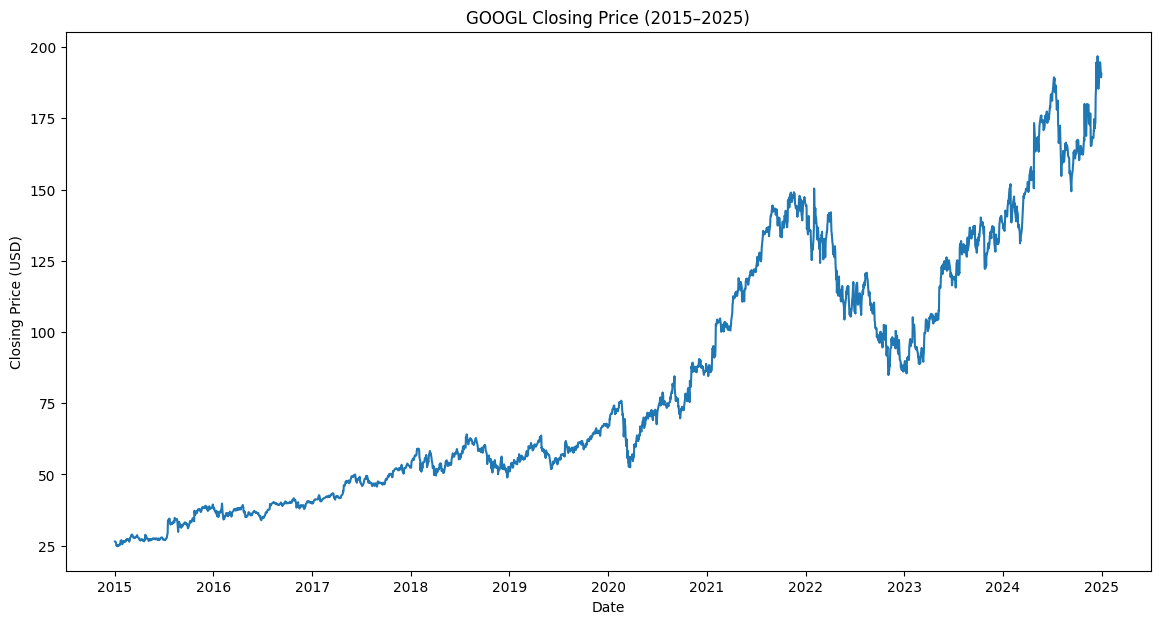

In [15]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.title('GOOGL Closing Price (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.7358915424803308
p-value: 0.9905275918850002


In [17]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)


In [18]:
diff_series = df['Close_diff'].dropna()


In [19]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(diff_series)

print('ADF:', result_diff[0])
print('p:', result_diff[1])

if result_diff[1] < 0.05:
    print("Stationary")
else:
    print("Not stationary")

ADF: -10.578278989296683
p: 7.012665453609692e-19
Stationary


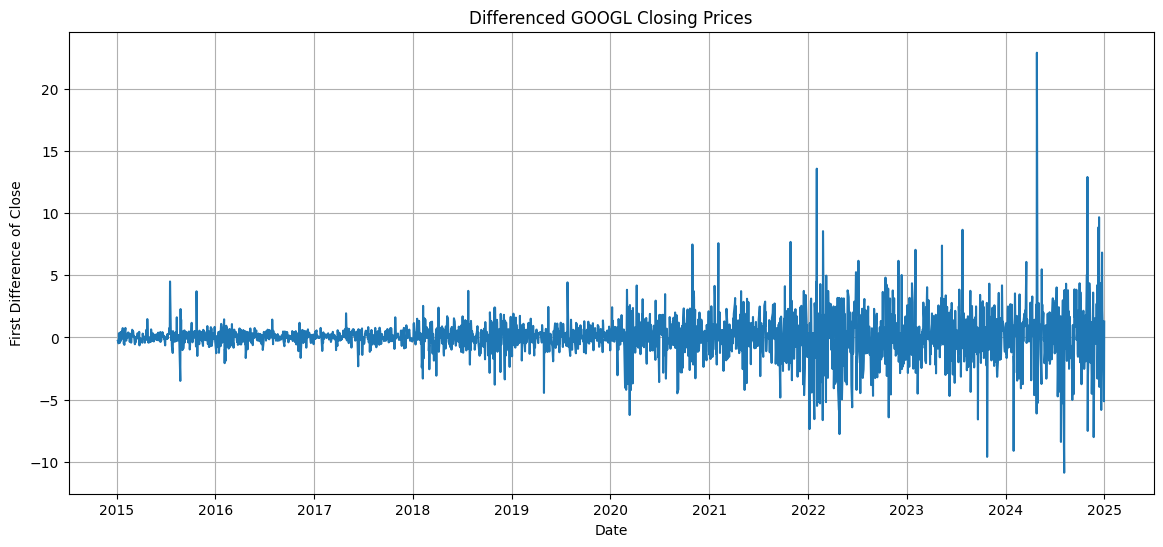

In [20]:
plt.figure(figsize=(14,6))
plt.plot(diff_series)
plt.title('Differenced GOOGL Closing Prices')
plt.xlabel('Date')
plt.ylabel('First Difference of Close')
plt.grid(True)
plt.show()

In [21]:
split = int(0.8 * len(diff_series))
train = diff_series[:split]
test = diff_series[split:]

In [22]:
import numpy
import tensorflow
print(numpy.__version__)
print(tensorflow.__version__)

1.26.4
2.19.0


In [23]:
import pmdarima as pm

# Fit auto_arima on training data
model = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Print the best ARIMA order found
print("Best ARIMA order:", model.order)


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7085.563, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7091.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7085.209, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7085.444, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7086.663, Time=0.05 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7086.105, Time=0.11 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7088.092, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7086.199, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.997 seconds
Best ARIMA order: (1, 0, 0)


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:
model.fit(train)

D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,order,"(1, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [25]:
forecast = model.predict(n_periods=len(test))

D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [26]:
print(train.index)


DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=2012, freq=None)


In [30]:
forecast = model.predict(n_periods=len(test))


D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [31]:
forecast_series = pd.Series(forecast, index=test.index)

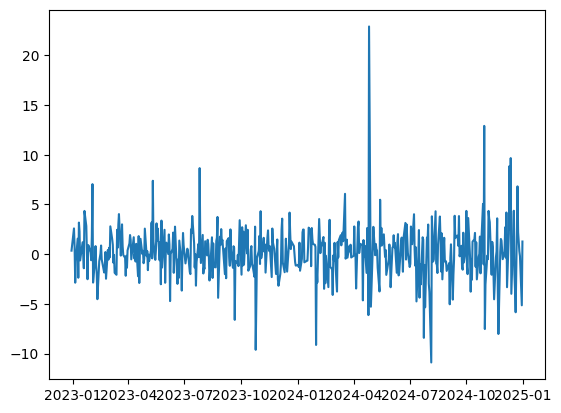

In [32]:
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_series, label='Forecast')

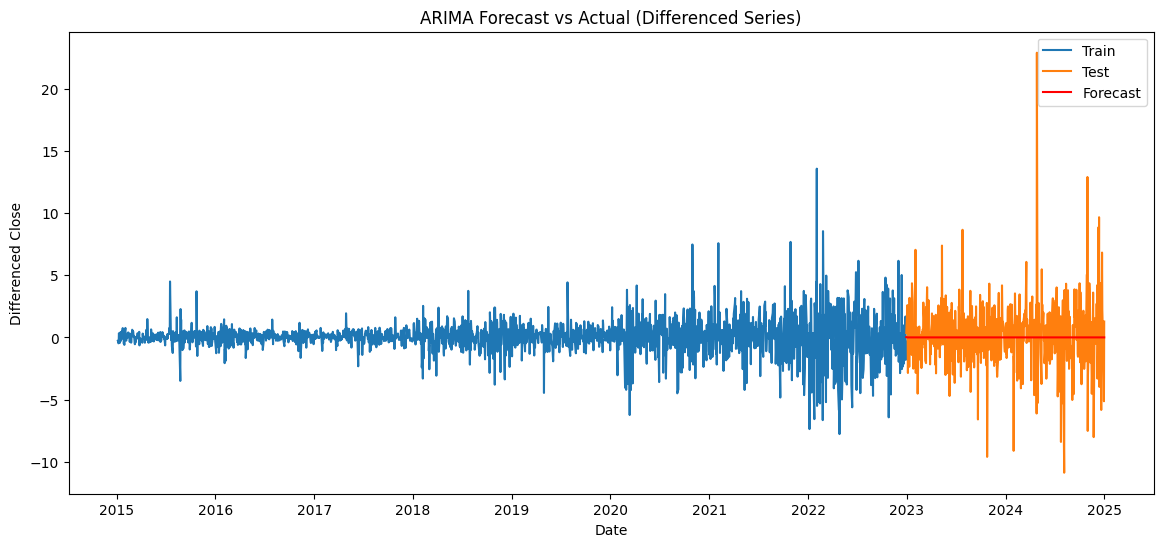

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Differenced Series)')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 1.8656
RMSE: 2.7033


In [35]:
import numpy as np

# diff_series: your full differenced time series
std_dev = np.std(diff_series)
min_val = np.min(diff_series)
max_val = np.max(diff_series)
range_val = max_val - min_val

print(f"Standard Deviation: {std_dev:.4f}")
print(f"Range: {range_val:.4f} (Min: {min_val:.4f}, Max: {max_val:.4f})")

Standard Deviation: 1.7450
Range: 33.7899 (Min: -10.8873, Max: 22.9026)


In [36]:
model = pm.auto_arima(train, seasonal=True, m=5, stepwise=True, trace=True)

D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=7088.463, Time=1.83 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=7092.137, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=7088.198, Time=0.13 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=7088.428, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=7091.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=7086.199, Time=0.09 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[5] intercept   : AIC=7088.198, Time=0.14 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[5] intercept   : AIC=7089.989, Time=0.89 sec
 ARIMA(2,0,0)(0,0,0)[5] intercept   : AIC=7087.686, Time=0.12 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=7087.126, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=7086.428, Time=0.10 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=7089.117, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[5]             : AIC=7085.209, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[5]             : AIC=7087.206, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[5]             : AIC=7087.207, Time=0.08 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[5]             : AIC=7088.958, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[5]             : AIC=7086.663, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[5]             : AIC=7086.105, Time=0.10 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[5]             : AIC=7085.444, Time=0.05 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[5]             : AIC=7088.092, Time=0.30 sec

Best model:  ARIMA(1,0,0)(0,0,0)[5]          
Total fit time: 5.628 seconds


In [37]:
# Fit model (if needed, auto_arima often does this already)
model.fit(train)

# Generate forecasts for test set
n_test = len(test)
forecast = model.predict(n_periods=n_test)

# Convert to pandas Series with test index for analysis and plotting
import pandas as pd
forecast_series = pd.Series(forecast, index=test.index)


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


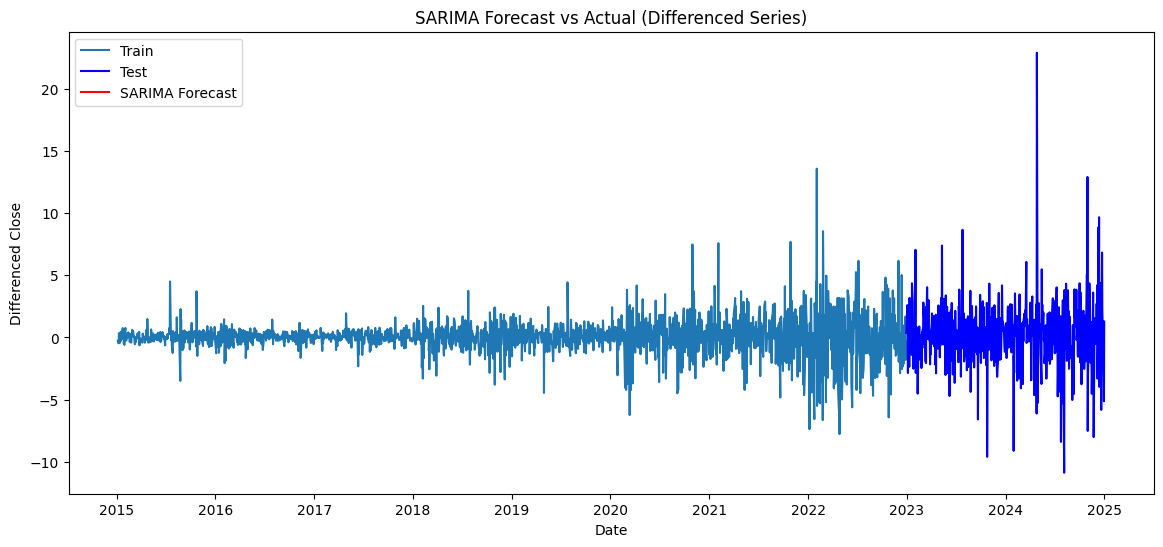

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast_series, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast vs Actual (Differenced Series)')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.legend()
plt.show()


In [40]:
print("Test set NaNs:", test.isna().sum())
print("Forecast NaNs:", forecast_series.isna().sum())


Test set NaNs: 0
Forecast NaNs: 503


In [42]:
import numpy as np

print("Number of NaNs in forecast:", np.isnan(forecast).sum())

# Optionally print indices of NaNs
nan_indices = np.where(np.isnan(forecast))[0]
print("Indices of NaNs in forecast:", nan_indices)


Number of NaNs in forecast: 0
Indices of NaNs in forecast: []


In [44]:
print(f"Forecast length: {len(forecast_series)}")
print(f"Forecast NaNs: {forecast_series.isna().sum()}")
print(f"Forecast non-NaNs: {forecast_series.notna().sum()}")


Forecast length: 503
Forecast NaNs: 503
Forecast non-NaNs: 0


In [45]:
import pmdarima as pm

model_simple = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)
forecast_simple = model_simple.predict(n_periods=len(test))
print("Non-seasonal forecast NaNs:", pd.Series(forecast_simple).isna().sum())


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7085.563, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7091.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7085.209, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7085.444, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7086.663, Time=0.05 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7086.105, Time=0.13 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7088.092, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7086.199, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.999 seconds
Non-seasonal forecast NaNs: 0


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [46]:
model_alt = pm.auto_arima(train, seasonal=True, m=7, stepwise=True, trace=True)
forecast_alt = model_alt.predict(n_periods=len(test))
print("Alternative seasonal forecast NaNs:", pd.Series(forecast_alt).isna().sum())


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=7089.849, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=7092.137, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=7088.186, Time=0.16 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=7088.418, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=7091.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=7086.199, Time=0.08 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=7088.187, Time=0.16 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=7090.008, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=7087.686, Time=0.12 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=7087.126, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=7086.428, Time=0.10 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=7089.117, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=7085.209, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=7087.202, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[7]             : AIC=7087.202, Time=0.09 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[7]             : AIC=7089.033, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[7]             : AIC=7086.663, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[7]             : AIC=7086.105, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=7085.444, Time=0.04 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[7]             : AIC=7088.092, Time=0.30 sec

Best model:  ARIMA(1,0,0)(0,0,0)[7]          
Total fit time: 6.594 seconds
Alternative seasonal forecast NaNs: 0


D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


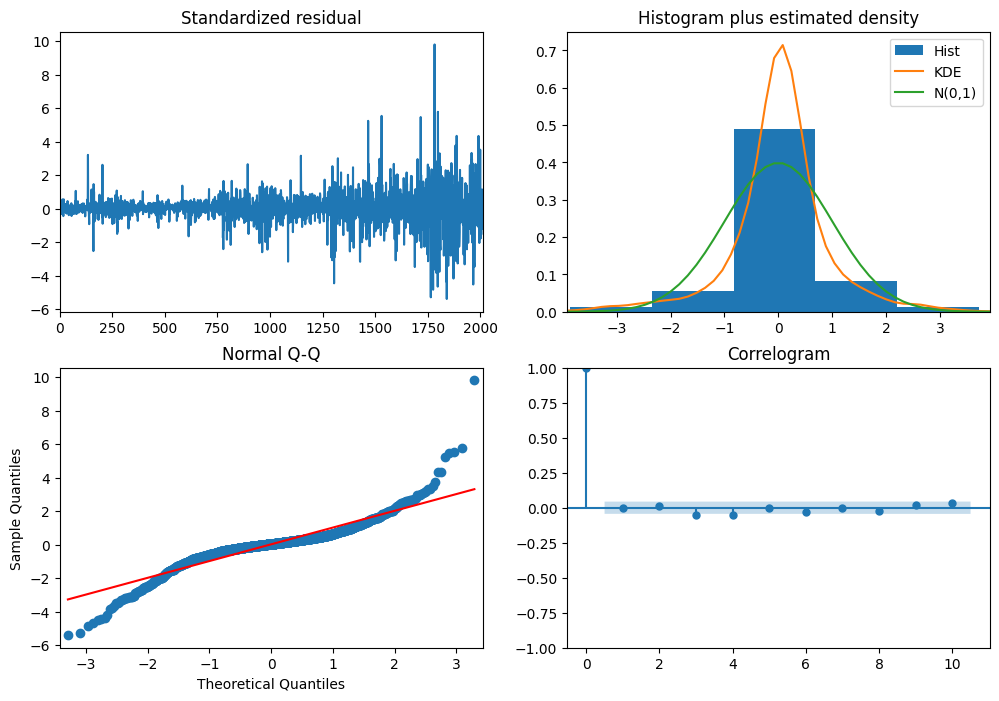

In [47]:
model.plot_diagnostics(figsize=(12,8))  # for pm.auto_arima models
plt.show()


In [48]:
print(train.isna().sum())
print(train.describe())


0
count    2012.000000
mean        0.029638
std         1.408852
min        -7.778358
25%        -0.429426
50%         0.049701
75%         0.540884
max        13.574126
Name: Close_diff, dtype: float64


In [49]:
import pmdarima as pm

model_simple = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)
forecast_simple = model_simple.predict(n_periods=len(test))
print("Non-seasonal forecast NaNs:", pd.Series(forecast_simple).isna().sum())


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7085.563, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7091.028, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7085.209, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7085.444, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7086.663, Time=0.06 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7086.105, Time=0.11 sec


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7088.092, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7086.199, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.972 seconds
Non-seasonal forecast NaNs: 0


D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\stock_forecasting_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [1]:
# Example: Split at end of 2021
split_date = '2021-12-31'
train = data.loc[:split_date, 'Close']
test = data.loc[split_date:, 'Close']


NameError: name 'data' is not defined

In [2]:
# Original close series
split_date = '2021-12-31'
train_close = data.loc[:split_date, 'Close']
test_close = data.loc[split_date:, 'Close']

# Differenced series with preserved index
diff_series = data['Close'].diff().dropna()
train_diff = diff_series.loc[:split_date]
test_diff = diff_series.loc[split_date:]


NameError: name 'data' is not defined

In [3]:
import pandas as pd

# Replace 'your_stock_data.csv' with the actual CSV file path
data = pd.read_csv('your_stock_data.csv')

# Make sure the Date column is parsed properly and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Now you can do your splitting as before
split_date = '2021-12-31'
train_close = data.loc[:split_date, 'Close']
test_close = data.loc[split_date:, 'Close']

diff_series = data['Close'].diff().dropna()
train_diff = diff_series.loc[:split_date]
test_diff = diff_series.loc[split_date:]


FileNotFoundError: [Errno 2] No such file or directory: 'your_stock_data.csv'